<a href="https://colab.research.google.com/github/Fazalisalive/PIAIC-Assignment/blob/master/Q3_Assignment_1_Develop_a_CNN_for_MNIST_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet to disable all logging output from TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
# 1. Download dataset using following command

import tensorflow as tf
(trainx, trainy), (testx, testy) = tf.keras.datasets.mnist.load_data()

In [ ]:
# 2. Check the size and plot the images
trainx.shape

(60000, 28, 28)

0


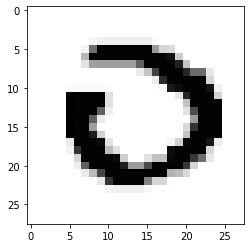

In [ ]:
# Lets randomly check what is available at any random index (say index # 45676) of our training dataset
import matplotlib.pyplot as plt
image_index = 45676
print(trainy[image_index])
plt.imshow(trainx[image_index], cmap='Greys')

In [ ]:
# 3. Apply one hot encoding, float conversion and normalization

# let's print the shape before we reshape and normalize the dataset
print("trainx shape", trainx.shape)
print("trainy shape", trainy.shape)
print("testx shape", testx.shape)
print("testy shape", testy.shape)


trainx shape (60000, 28, 28)
trainy shape (60000,)
testx shape (10000, 28, 28)
testy shape (10000,)


In [ ]:
# building the input vector from the 28x28 pixels
# Reshaping the array to 4-dimensions so that it can work with the Keras API
trainx = trainx.reshape(trainx.shape[0], 28, 28, 1)
testx = testx.reshape(testx.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# float conversion

trainx = trainx.astype('float32')
testx = testx.astype('float32')

# normalization

trainx /= 255.0
testx /= 255.0

In [ ]:
print('trainx Shape:', trainx.shape)
print('No. of Images in trainx:', trainx.shape[0])
print('No. of Images in testx:', testx.shape[0])

trainx Shape: (60000, 28, 28, 1)
No. of Images in trainx: 60000
No. of Images in testx: 10000


In [ ]:
# print the final input shape ready for training
print("Train matrix shape", trainx.shape)
print("Test matrix shape", testx.shape)

Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


In [ ]:
# Lets check what are the unique no. of values in in numpy array to identify classication level
print(np.unique(trainy, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
# one-hot encoding using keras' numpy-related utilities
#n_classes = 10
#print('Shape before one hot encoding:', trainy.shape)
#trainy = np_utils.to_categorical(trainy, n_classes)
#testy = np_utils.to_categorical(testy, n_classes)
#print('Shape after one hot encoding:', trainy.shape)

In [ ]:
# 4. Define your CNN architecture and 5. Set your parameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Creating a Sequential Model and adding the layers

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten())

model.add(Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 28)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               229504    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 231,074
Trainable params: 231,074
Non-trainable params: 0
________________________________________________

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3911 - accuracy: 0.8838 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0782 - accuracy: 0.9745 - val_loss: 0.0455 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0532 - accuracy: 0.9846 - val_loss: 0.0388 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0358 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0308 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0367 -

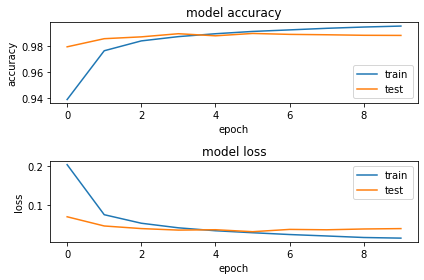

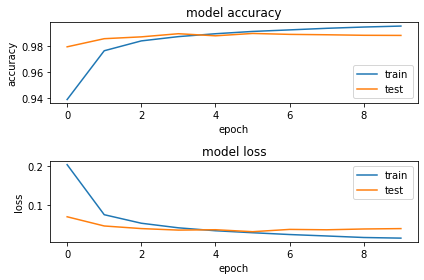

In [ ]:
# 6. Run your model to evaluate the results

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Model Evaluation

history = model.fit(x=trainx, y=trainy,
                    epochs=10,
                    validation_data=(testx, testy))

# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

# New Section